In [1]:
%cd /content

!pip install gdown --quiet
import os
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Candidate folder inside repo
base_repo = "Market-sentiment-analysis/ds_PiyushAgrawal"
csv_folder = os.path.join(base_repo, "csv_files")
output_folder = os.path.join(base_repo, "outputs")

# Ensure folders exist
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

print("✅ Project folders ready")


# Historical Trader Data
file_id_trader = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
trader_path = os.path.join(csv_folder, "historical_trader_data.csv")
gdown.download(f"https://drive.google.com/uc?id={file_id_trader}", trader_path, quiet=False)

# Fear & Greed Index
file_id_fg = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
fg_path = os.path.join(csv_folder, "fear_greed_index.csv")
gdown.download(f"https://drive.google.com/uc?id={file_id_fg}", fg_path, quiet=False)

print("✅ Data downloaded to csv_files/")


/content
✅ Project folders ready


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/Market-sentiment-analysis/ds_PiyushAgrawal/csv_files/historical_trader_data.csv
100%|██████████| 47.5M/47.5M [00:00<00:00, 85.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/Market-sentiment-analysis/ds_PiyushAgrawal/csv_files/fear_greed_index.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 3.45MB/s]

✅ Data downloaded to csv_files/


In [2]:
# Load CSVs
trader_df = pd.read_csv(trader_path)
fg_df = pd.read_csv(fg_path)

print("Trader Data Shape:", trader_df.shape)
print("Fear & Greed Shape:", fg_df.shape)

Trader Data Shape: (211224, 16)
Fear & Greed Shape: (2644, 4)


In [3]:
trader_df.columns=trader_df.columns.str.strip().str.lower().str.replace(' ','_')
fg_df.columns=fg_df.columns.str.strip().str.lower().str.replace(' ','_')

trader_df.head(2),fg_df.head(2)

trader_df.columns.tolist()

['account',
 'coin',
 'execution_price',
 'size_tokens',
 'size_usd',
 'side',
 'timestamp_ist',
 'start_position',
 'direction',
 'closed_pnl',
 'transaction_hash',
 'order_id',
 'crossed',
 'fee',
 'trade_id',
 'timestamp']

In [4]:

trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp_ist'], errors='coerce')

trader_df['date'] = trader_df['timestamp_ist'].dt.date
trader_df['time_only'] = trader_df['timestamp_ist'].dt.time

fg_df['date'] = pd.to_datetime(fg_df['date'], errors='coerce').dt.date

merged_df = trader_df.merge(
    fg_df[['date', 'classification']],
    on='date',
    how='left'
)

print("Merged Data Shape:", merged_df.shape)
print(merged_df[['timestamp_ist', 'date', 'time_only', 'classification']].head())


Merged Data Shape: (211224, 19)
        timestamp_ist        date time_only classification
0 2024-02-12 22:50:00  2024-02-12  22:50:00          Greed
1 2024-02-12 22:50:00  2024-02-12  22:50:00          Greed
2 2024-02-12 22:50:00  2024-02-12  22:50:00          Greed
3 2024-02-12 22:50:00  2024-02-12  22:50:00          Greed
4 2024-02-12 22:50:00  2024-02-12  22:50:00          Greed


In [5]:
trader_df['timestamp_ist']=pd.to_datetime(trader_df['timestamp_ist'],errors='coerce',utc=True)

trader_df['date']=trader_df['timestamp_ist'].dt.date
trader_df['time']=trader_df['timestamp_ist'].dt.time

trader_df[['timestamp_ist','date','time']].head()

,timestamp_ist,date,time
0,2024-02-12 22:50:00+00:00,2024-02-12,22:50:00
1,2024-02-12 22:50:00+00:00,2024-02-12,22:50:00
2,2024-02-12 22:50:00+00:00,2024-02-12,22:50:00
3,2024-02-12 22:50:00+00:00,2024-02-12,22:50:00
4,2024-02-12 22:50:00+00:00,2024-02-12,22:50:00


In [6]:
fg_df['date']=pd.to_datetime(fg_df['date'],errors='coerce',utc=True)

trader_df['date'] = pd.to_datetime(trader_df['timestamp_ist']).dt.normalize()

fg_df['date'] = pd.to_datetime(fg_df['date']).dt.normalize()

merged_df = trader_df.merge(
    fg_df[['date', 'classification']],
    on='date',
    how='left'
)

print("Merged Data Shape:", merged_df.shape)
print(merged_df[['timestamp_ist', 'date', 'time_only', 'classification']].head())


Merged Data Shape: (211224, 20)
              timestamp_ist                      date time_only classification
0 2024-02-12 22:50:00+00:00 2024-02-12 00:00:00+00:00  22:50:00          Greed
1 2024-02-12 22:50:00+00:00 2024-02-12 00:00:00+00:00  22:50:00          Greed
2 2024-02-12 22:50:00+00:00 2024-02-12 00:00:00+00:00  22:50:00          Greed
3 2024-02-12 22:50:00+00:00 2024-02-12 00:00:00+00:00  22:50:00          Greed
4 2024-02-12 22:50:00+00:00 2024-02-12 00:00:00+00:00  22:50:00          Greed


In [7]:
merged_df['classification'] = merged_df['classification'].fillna(method='ffill')


/tmp/ipython-input-3910310548.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['classification'] = merged_df['classification'].fillna(method='ffill')


In [8]:
missing_count = merged_df['classification'].isna().sum()
total_trades = merged_df.shape[0]

print(f"Total trades: {total_trades}")
print(f"Trades without classification: {missing_count}")
print(f"Missing %: {100 * missing_count/total_trades:.2f}%")

if missing_count > 0:
    print("\nSample trades without classification:")
    display(merged_df[merged_df['classification'].isna()].head())


Total trades: 211224
Trades without classification: 0
Missing %: 0.00%


In [9]:
merged_df['profit_flag'] = (merged_df['closed_pnl'] > 0).astype(int)
# Summary stats
summary = merged_df.groupby('classification')['closed_pnl'].agg(['mean','median','std','count'])
print("✅ Summary statistics by sentiment")
display(summary)

# Save summary
summary_path = os.path.join(output_folder, "trade_summary.csv")
summary.to_csv(summary_path)

✅ Summary statistics by sentiment


,mean,median,std,count
classification,,,,
Extreme Fear,35.493854,0.0,524.963104,17191
Extreme Greed,95.377129,0.0,988.998762,30931
Fear,46.030630,0.0,1018.882350,89909
Greed,39.997999,0.0,923.339546,57581
Neutral,18.894528,0.0,246.600971,15612


In [10]:
# --- 1. Sentiment to numeric score ---
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
merged_df['sentiment_score'] = merged_df['classification'].map(sentiment_map)

merged_df['profit_flag'] = (merged_df['closed_pnl'] > 0).astype(int)

if 'leverage' in merged_df.columns:
    merged_df['risk_exposure'] = merged_df['size_usd'] * merged_df['leverage']
else:
    merged_df['risk_exposure'] = merged_df['size_usd']

trader_stats = merged_df.groupby('account').agg(
    total_trades = ('trade_id', 'count'),
    win_rate = ('profit_flag', 'mean'),
    avg_pnl = ('closed_pnl', 'mean'),
    total_pnl = ('closed_pnl', 'sum'),
    avg_size_usd = ('size_usd', 'mean'),
    avg_sentiment = ('sentiment_score', 'mean')
).reset_index()

print("Trader-level stats sample:")
print(trader_stats.head())


Trader-level stats sample:
                                      account  total_trades  win_rate  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012          3818  0.359612   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd          7280  0.442720   
2  0x271b280974205ca63b716753467d5a371de622ab          3809  0.301917   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4         13311  0.438585   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd          3239  0.519914   

      avg_pnl     total_pnl  avg_size_usd  avg_sentiment  
0  419.127768  1.600230e+06  16159.576734       2.040073  
1    6.577654  4.788532e+04   1653.226327       0.962363  
2  -18.492043 -7.043619e+04   8893.000898       3.000000  
3    9.951530  1.324648e+05    507.626933       2.137555  
4   52.071011  1.686580e+05   3138.894782       3.109293  


/tmp/ipython-input-1037206879.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'], palette="viridis")


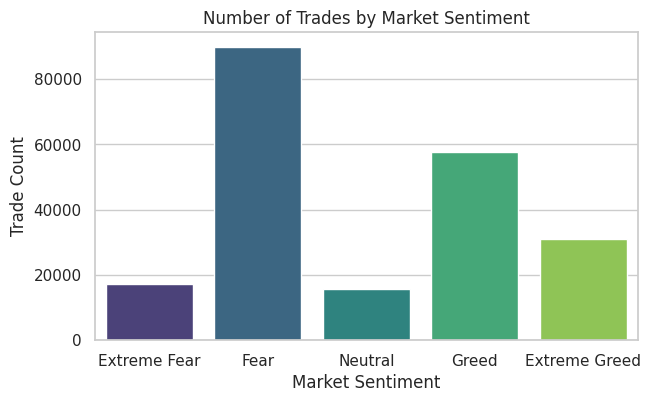

/tmp/ipython-input-1037206879.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='closed_pnl',


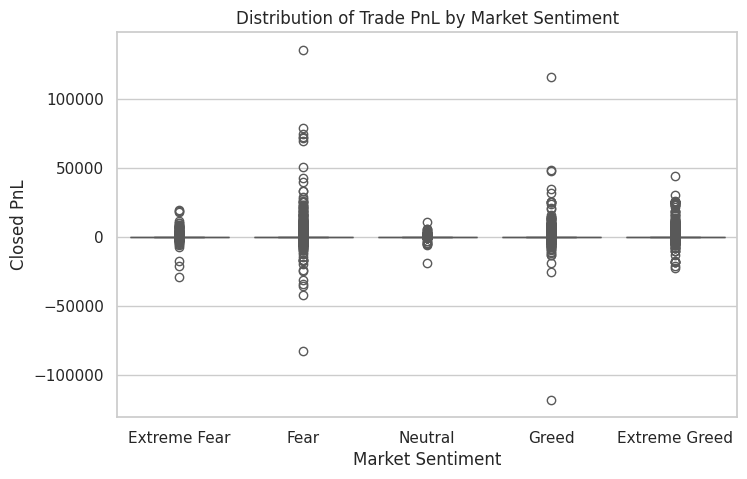

/tmp/ipython-input-1037206879.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rate.index, y=win_rate.values, palette="coolwarm")


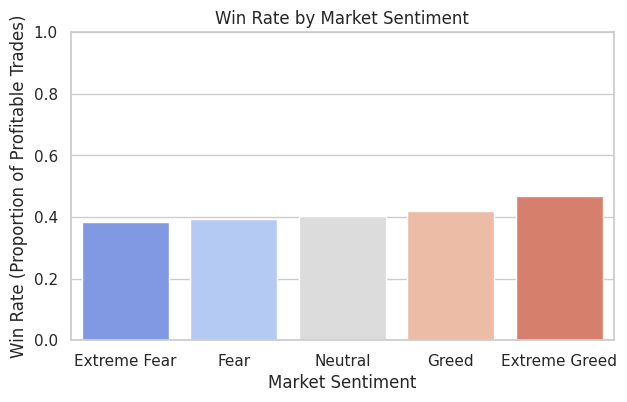

/tmp/ipython-input-1037206879.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_avg.index, y=risk_avg.values, palette="mako")


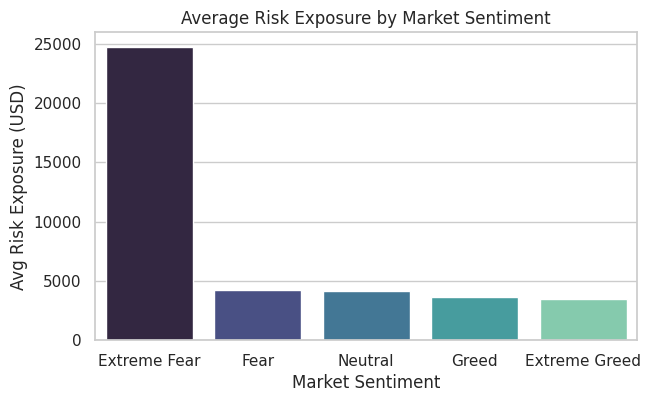

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(7,4))
sns.countplot(data=merged_df, x='classification', order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'], palette="viridis")
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")
plt.savefig(os.path.join(output_folder, "trade_count_by_sentiment.png"))
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='closed_pnl',
            order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'], palette="Set2")
plt.title("Distribution of Trade PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.savefig(os.path.join(output_folder, "pnl_distribution_by_sentiment.png"))
plt.show()

win_rate = merged_df.groupby('classification')['profit_flag'].mean().reindex(
    ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']
)

plt.figure(figsize=(7,4))
sns.barplot(x=win_rate.index, y=win_rate.values, palette="coolwarm")
plt.title("Win Rate by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate (Proportion of Profitable Trades)")
plt.ylim(0,1)
plt.savefig(os.path.join(output_folder, "winrate_by_sentiment.png"))
plt.show()

risk_avg = merged_df.groupby('classification')['risk_exposure'].mean().reindex(
    ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']
)

plt.figure(figsize=(7,4))
sns.barplot(x=risk_avg.index, y=risk_avg.values, palette="mako")
plt.title("Average Risk Exposure by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg Risk Exposure (USD)")
plt.savefig(os.path.join(output_folder, "avg_risk_exposure_by_sentiment.png"))
plt.show()


In [12]:
from scipy import stats
import pandas as pd

# --- 1. ANOVA: Does PnL differ across sentiments? ---
groups = [merged_df.loc[merged_df['classification']==s, 'closed_pnl'].dropna()
          for s in ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']]

anova_result = stats.f_oneway(*groups)
print("ANOVA result for Closed PnL across sentiment categories:")
print(anova_result)

# If p < 0.05, we reject null → PnL differs significantly between groups

# --- 2. Kruskal-Wallis (non-parametric test, safer for skewed PnL) ---
kruskal_result = stats.kruskal(*groups)
print("\nKruskal-Wallis result for Closed PnL across sentiment categories:")
print(kruskal_result)

# --- 3. Chi-Square: Is win rate independent of sentiment? ---
contingency_table = pd.crosstab(merged_df['classification'], merged_df['profit_flag'])
chi2_result = stats.chi2_contingency(contingency_table)

print("\nChi-Square test for Profitability vs Sentiment:")
print("Chi2 statistic:", chi2_result[0])
print("p-value:", chi2_result[1])
print("Degrees of freedom:", chi2_result[2])
print("\nContingency Table:")
print(contingency_table)


ANOVA result for Closed PnL across sentiment categories:
F_onewayResult(statistic=np.float64(26.424905127982527), pvalue=np.float64(6.085987384027084e-22))

Kruskal-Wallis result for Closed PnL across sentiment categories:
KruskalResult(statistic=np.float64(957.4381135533374), pvalue=np.float64(5.969558754898606e-206))

Chi-Square test for Profitability vs Sentiment:
Chi2 statistic: 642.1125500022396
p-value: 1.1884013925878735e-137
Degrees of freedom: 4

Contingency Table:
profit_flag         0      1
classification              
Extreme Fear    10602   6589
Extreme Greed   16427  14504
Fear            54653  35256
Greed           33352  24229
Neutral          9321   6291


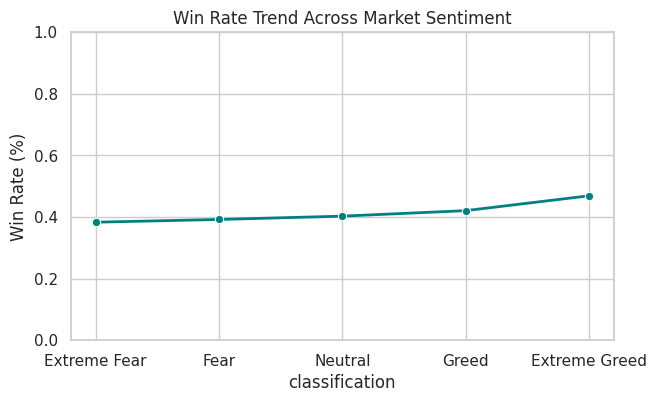

/tmp/ipython-input-2239961238.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")


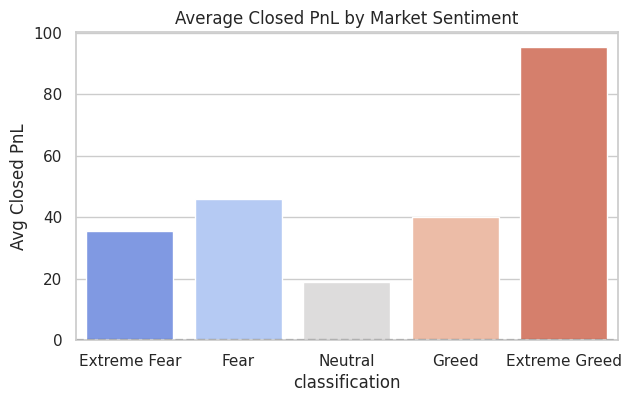

/tmp/ipython-input-2239961238.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_df, x='classification', y='closed_pnl',


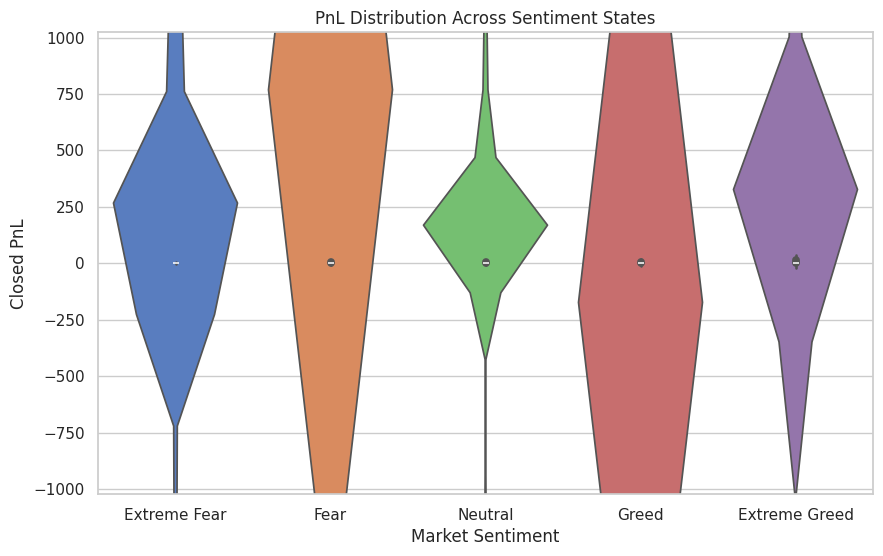

/tmp/ipython-input-2239961238.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='risk_exposure',


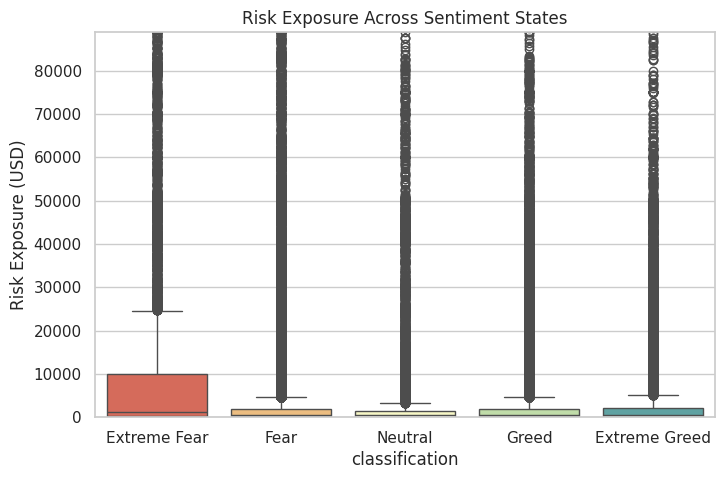

In [13]:
# --- 1. Win Rate Trend ---
win_rate = merged_df.groupby('classification')['profit_flag'].mean().reindex(
    ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']
)

plt.figure(figsize=(7,4))
sns.lineplot(x=win_rate.index, y=win_rate.values, marker='o', linewidth=2, color="teal")
plt.title("Win Rate Trend Across Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.ylim(0,1)
plt.savefig(os.path.join(output_folder, "winrate_trend.png"))
plt.show()


# --- 2. Average PnL by Sentiment ---
avg_pnl = merged_df.groupby('classification')['closed_pnl'].mean().reindex(
    ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']
)

plt.figure(figsize=(7,4))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="coolwarm")
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Avg Closed PnL")
plt.axhline(0, color='black', linestyle='--')
plt.savefig(os.path.join(output_folder, "Avg_pnl_by_sentiment.png"))
plt.show()


# --- 3. PnL Distribution by Sentiment (Violin Plot) ---
plt.figure(figsize=(10,6))
sns.violinplot(data=merged_df, x='classification', y='closed_pnl',
               order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'],
               palette="muted", cut=0)
plt.title("PnL Distribution Across Sentiment States")
plt.ylabel("Closed PnL")
plt.xlabel("Market Sentiment")
plt.ylim(-merged_df['closed_pnl'].quantile(0.99), merged_df['closed_pnl'].quantile(0.99))  # trim outliers
plt.savefig(os.path.join(output_folder, "Pnl_distribution.png"))
plt.show()


# --- 4. Risk Exposure by Sentiment ---
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='risk_exposure',
            order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'], palette="Spectral")
plt.title("Risk Exposure Across Sentiment States")
plt.ylabel("Risk Exposure (USD)")
plt.ylim(0, merged_df['risk_exposure'].quantile(0.99))  # cut extreme outliers
plt.savefig(os.path.join(output_folder, "Risk_exposure.png"))
plt.show()


/tmp/ipython-input-450559705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_by_sentiment.index, y=risk_by_sentiment.values, palette="coolwarm")


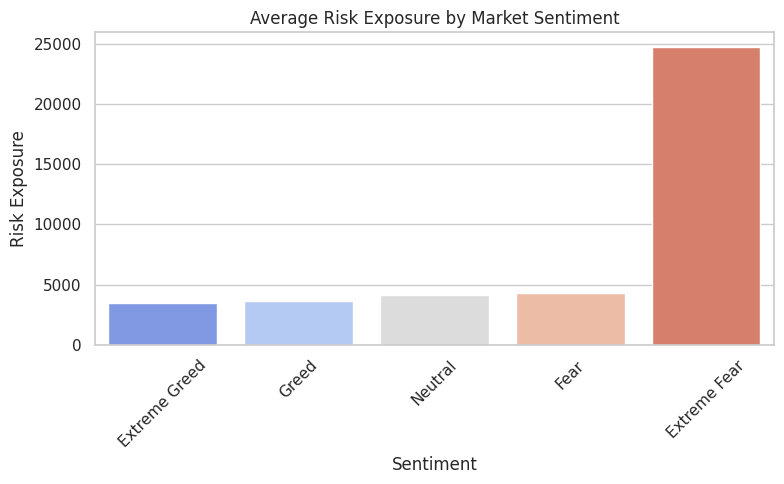

In [14]:
# Average risk exposure per sentiment
risk_by_sentiment = merged_df.groupby('classification')['risk_exposure'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=risk_by_sentiment.index, y=risk_by_sentiment.values, palette="coolwarm")
plt.title("Average Risk Exposure by Market Sentiment")
plt.ylabel("Risk Exposure")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()

# Save inside ds_PiyushAgrawal/outputs/
plt.savefig(os.path.join(output_folder, "risk_vs_sentiment.png"))
plt.show()


/tmp/ipython-input-4110163066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette="viridis")


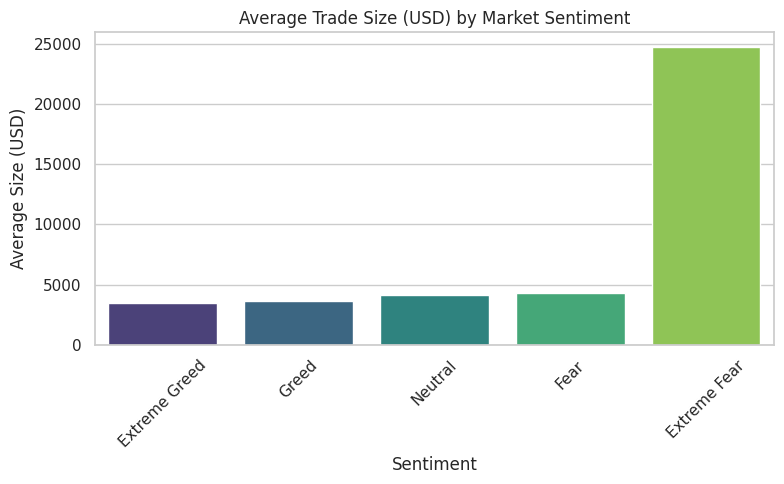

In [15]:
volume_by_sentiment = merged_df.groupby('classification')['size_usd'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette="viridis")
plt.title("Average Trade Size (USD) by Market Sentiment")
plt.ylabel("Average Size (USD)")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(output_folder, "volume_vs_sentiment.png"))
plt.show()


In [16]:
# Win rate by sentiment
winrate_by_sentiment = merged_df.groupby('classification')['profit_flag'].mean() * 100

# Save as CSV
# Save CSV into ds_PiyushAgrawal/csv_files/
winrate_by_sentiment.to_csv(os.path.join(csv_folder, "winrate_by_sentiment.csv"))
print("Win Rate by Sentiment:\n", winrate_by_sentiment)

Win Rate by Sentiment:
 classification
Extreme Fear     38.328195
Extreme Greed    46.891468
Fear             39.212982
Greed            42.078116
Neutral          40.295926
Name: profit_flag, dtype: float64


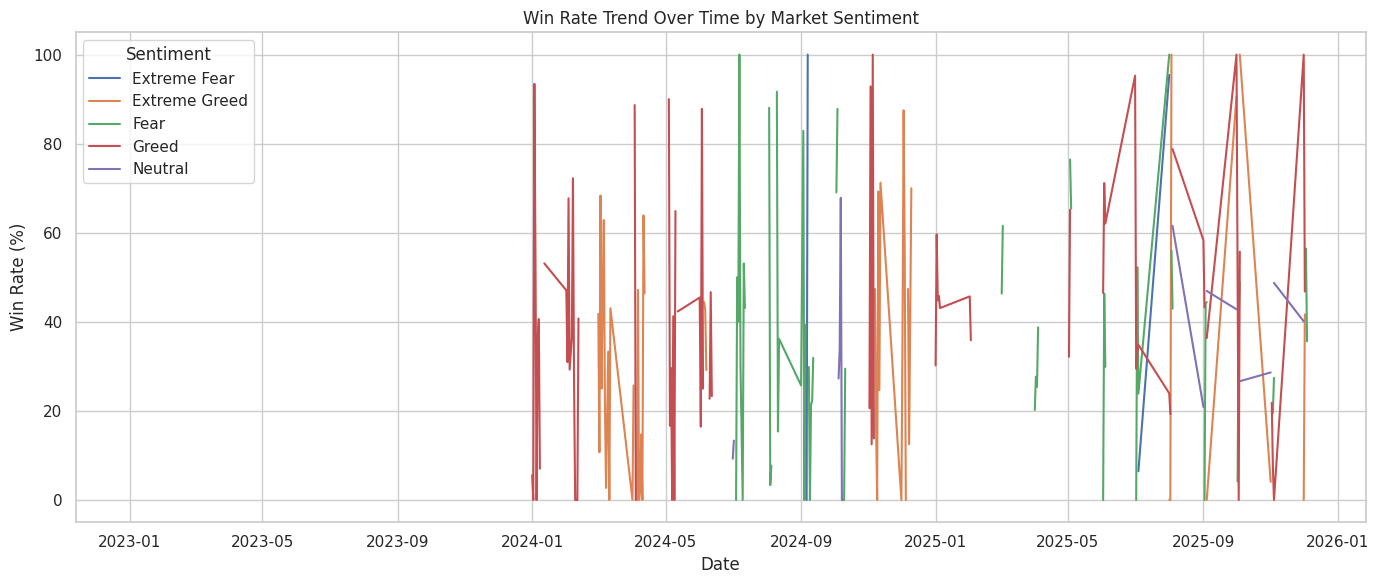

In [17]:
#win rate trend over time
# Ensure profit_flag exists
if "profit_flag" not in merged_df.columns:
    merged_df['profit_flag'] = (merged_df['closed_pnl'] > 0).astype(int)

# Group by date and sentiment
winrate_trend = merged_df.groupby(['date', 'classification'])['profit_flag'].mean().reset_index()
winrate_trend['profit_flag'] *= 100  # convert to %

# Pivot for plotting
winrate_pivot = winrate_trend.pivot(index='date', columns='classification', values='profit_flag')

# Plot trend
plt.figure(figsize=(14,6))
for col in winrate_pivot.columns:
    plt.plot(winrate_pivot.index, winrate_pivot[col], label=col)

plt.title("Win Rate Trend Over Time by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Win Rate (%)")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.savefig(os.path.join(output_folder,"winrate_trend_over_time.png"))
plt.show()

# Save to CSV
winrate_trend.to_csv(os.path.join(csv_folder,"winrate_trend_over_time.csv"))


In [18]:
# Ensure profit_flag exists
if "profit_flag" not in merged_df.columns:
    merged_df['profit_flag'] = (merged_df['closed_pnl'] > 0).astype(int)

# Calculate summary stats per sentiment
winrate_summary = merged_df.groupby('classification')['profit_flag'].agg(
    mean_winrate = lambda x: round(x.mean() * 100, 2),
    min_winrate  = lambda x: round(x.min() * 100, 2),
    max_winrate  = lambda x: round(x.max() * 100, 2),
    std_winrate  = lambda x: round(x.std() * 100, 2)
).reset_index()

# Save summary table
winrate_summary.to_csv(os.path.join(csv_folder,"winrate_summary.csv"))

print("✅ Win Rate Summary by Sentiment:")
print(winrate_summary)



✅ Win Rate Summary by Sentiment:
  classification  mean_winrate  min_winrate  max_winrate  std_winrate
0   Extreme Fear         38.33            0          100        48.62
1  Extreme Greed         46.89            0          100        49.90
2           Fear         39.21            0          100        48.82
3          Greed         42.08            0          100        49.37
4        Neutral         40.30            0          100        49.05


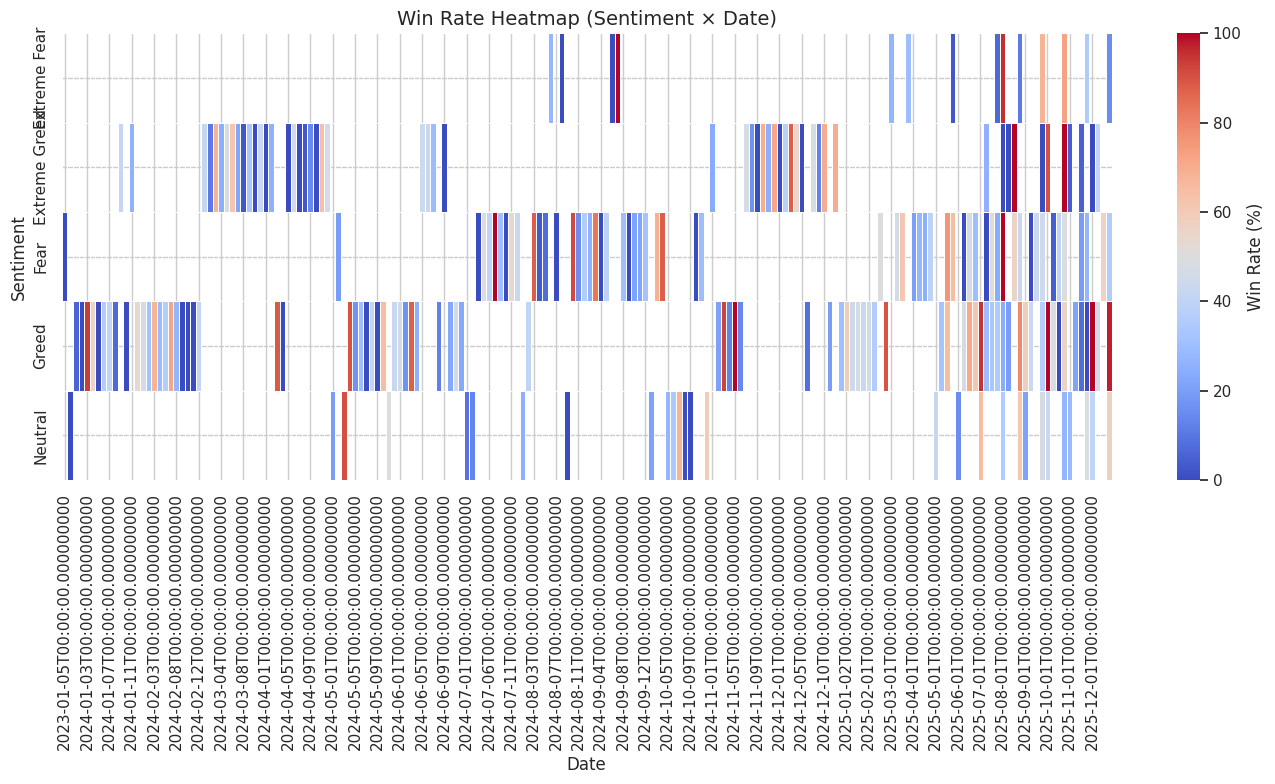

In [19]:
import seaborn as sns

# Ensure profit_flag exists
if "profit_flag" not in merged_df.columns:
    merged_df['profit_flag'] = (merged_df['closed_pnl'] > 0).astype(int)

# Daily win rate by sentiment
winrate_trend = merged_df.groupby(['date', 'classification'])['profit_flag'].mean().reset_index()
winrate_trend['profit_flag'] *= 100  # convert to %

# Pivot table for heatmap
heatmap_data = winrate_trend.pivot(index="date", columns="classification", values="profit_flag")

# Plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data.T, cmap="coolwarm", cbar_kws={'label': 'Win Rate (%)'}, linewidths=0.5)

plt.title("Win Rate Heatmap (Sentiment × Date)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.tight_layout()
plt.savefig(os.path.join(output_folder,"winrate_heatmap.png"))
plt.show()


In [20]:
!rm -rf ds_PiyushAgrawal

In [21]:
!git clone https://github.com/Piyushagrawal08/Market-sentiment-analysis.git
%cd Market-sentiment-analysis


fatal: destination path 'Market-sentiment-analysis' already exists and is not an empty directory.
/content/Market-sentiment-analysis


In [22]:
!git config --global user.name "Piyushagrawal08"
!git config --global user.email "piyushagrawal0804@gmail.com"

In [23]:
!mkdir -p ds_PiyushAgrawal/csv_files
!mkdir -p ds_PiyushAgrawal/outputs

!touch ds_PiyushAgrawal/notebook_1.ipynb
!touch ds_PiyushAgrawal/ds_report.pdf
!touch ds_PiyushAgrawal/README.md

In [24]:
!apt-get install tree -qq
!tree ds_PiyushAgrawal

Selecting previously unselected package tree.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
ds_PiyushAgrawal
├── csv_files
│   ├── fear_greed_index.csv
│   ├── historical_trader_data.csv
│   ├── winrate_by_sentiment.csv
│   ├── winrate_summary.csv
│   └── winrate_trend_over_time.csv
├── ds_report.pdf
├── notebook_1.ipynb
├── outputs
│   ├── Avg_pnl_by_sentiment.png
│   ├── avg_risk_exposure_by_sentiment.png
│   ├── pnl_distribution_by_sentiment.png
│   ├── Pnl_distribution.png
│   ├── Risk_exposure.png
│   ├── risk_vs_sentiment.png
│   ├── trade_count_by_sentiment.png
│   ├── trade_summary.csv
│   ├── volume_vs_sentiment.png
│   ├── winrate_by_sentiment.png
│   ├── winrate_heatmap.png
│   ├── winrate_trend_over_time.png
│   └── winrate_trend.png
└── README.md

2 directories, 21 files
